# Star Wars Survey

In [40]:
import pandas as pd
import numpy as np

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head()


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [41]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [42]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Removing null values from Respondent ID column

In [43]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

## Converting Yes/No values to Booleans

In [44]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [45]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [46]:
m = {"Yes": True, "No": False, }
cols = ["Have you seen any of the 6 films in the Star Wars franchise?", 
        "Do you consider yourself to be a fan of the Star Wars film franchise?"]
for c in cols:
    star_wars[c] = star_wars[c].map(m)

In [47]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [48]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [49]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [50]:
star_wars["Unnamed: 7"].value_counts(dropna=False)

Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64

In [51]:
for c in star_wars.columns[3:9]:
    m = {"Star Wars: Episode I  The Phantom Menace": True,
         "Star Wars: Episode II  Attack of the Clones": True,
         "Star Wars: Episode III  Revenge of the Sith": True,
         "Star Wars: Episode IV  A New Hope": True,
         "Star Wars: Episode V The Empire Strikes Back": True,
         "Star Wars: Episode VI Return of the Jedi": True,
         np.NaN: False}
    star_wars[c] = star_wars[c].map(m)

In [52]:
star_wars = star_wars.rename(columns= {"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
                                     'Unnamed: 4': 'seen_2',
                                     'Unnamed: 5': 'seen_3',
                                     'Unnamed: 6': 'seen_4',
                                     'Unnamed: 7': 'seen_5',
                                     'Unnamed: 8': 'seen_6'})

In [53]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [54]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [55]:
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
                                      'Unnamed: 10': 'ranking_2',
                                      'Unnamed: 11': 'ranking_3',
                                      'Unnamed: 12': 'ranking_4',
                                      'Unnamed: 13': 'ranking_5',
                                      'Unnamed: 14': 'ranking_6'})

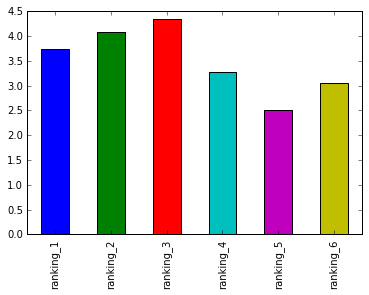

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

star_wars.iloc[:,9:15].mean().plot.bar()



* Star Wars: Episode III  Revenge of the Sith is the least favorite film
* Star Wars: Episode V  The Empire Strikes Back is the most favorite film.

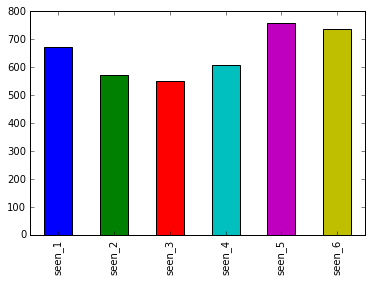

In [57]:
star_wars.iloc[:,3:9].sum().plot.bar()

* Most voters have seen Star Wars: Episode V The Empire Strikes Back & Star Wars: Episode VI Return of the Jedi
* It seems the more people who have seen a film, the more likely they will rank them higher.

## Fans vs Non-fans

In [58]:
star_wars_fans = star_wars[star_wars.iloc[:,2] == True]
non_star_wars_fans = star_wars[star_wars.iloc[:,2] != True]

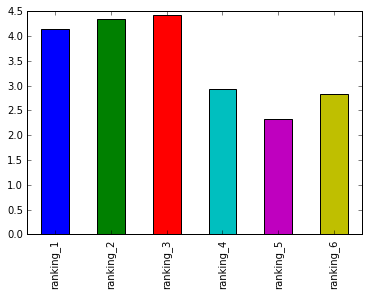

In [59]:
star_wars_fans.iloc[:,9:15].mean().plot.bar()


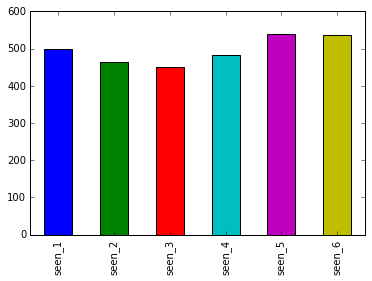

In [60]:
star_wars_fans.iloc[:,3:9].sum().plot.bar()

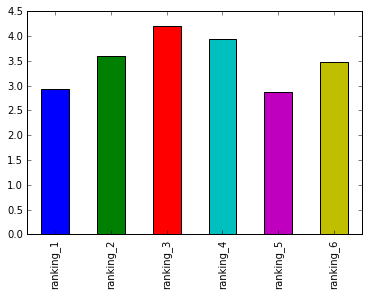

In [61]:
non_star_wars_fans.iloc[:,9:15].mean().plot.bar()

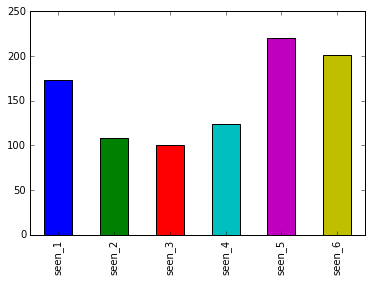

In [62]:
non_star_wars_fans.iloc[:,3:9].sum().plot.bar()

* Both groups rank the films similarly
* Most fans have seen all of the films


## Male vs Female

In [63]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

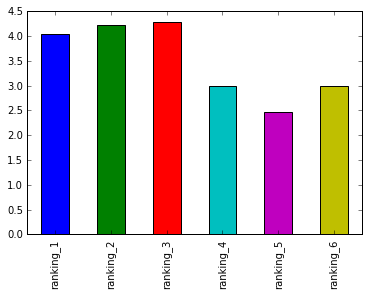

In [64]:
males.iloc[:,9:15].mean().plot.bar()

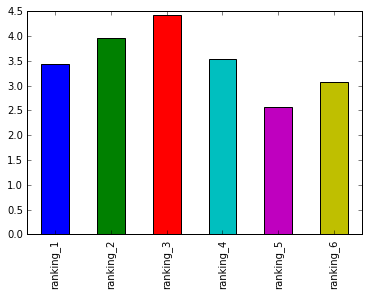

In [65]:
females.iloc[:,9:15].mean().plot.bar()

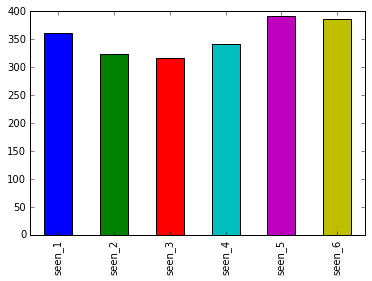

In [66]:
males.iloc[:,3:9].sum().plot.bar()

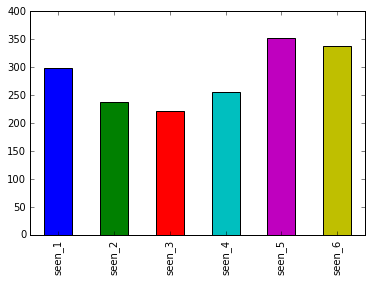

In [67]:
females.iloc[:,3:9].sum().plot.bar()

In [68]:
males["Gender"].describe()

count      497
unique       1
top       Male
freq       497
Name: Gender, dtype: object

In [69]:
females["Gender"].describe()

count        549
unique         1
top       Female
freq         549
Name: Gender, dtype: object

* Films are rated similarly for both gender
* More males than females have seen all the films despite having more females


## Favorite characters

In [70]:
characters = (pd.read_csv("star_wars.csv", encoding="ISO-8859-1")).iloc[0,15:29]
characters

Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.                Han Solo
Unnamed: 16                                                                                                             Luke Skywalker
Unnamed: 17                                                                                                       Princess Leia Organa
Unnamed: 18                                                                                                           Anakin Skywalker
Unnamed: 19                                                                                                             Obi Wan Kenobi
Unnamed: 20                                                                                                          Emperor Palpatine
Unnamed: 21                                                                                                                Darth Vader
Unnamed: 22                                            

In [71]:
star_wars = star_wars.rename(columns={"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
                              "Unnamed: 16": "Luke Skywalker",
                              "Unnamed: 17": "Princess Leia Organa",
                              "Unnamed: 18": "Anakin Skywalker",
                              "Unnamed: 19": "Obi Wan Kenobi",                                                                                                            
                              "Unnamed: 20": "Emperor Palpatine",
                              "Unnamed: 21": "Darth Vader",
                              "Unnamed: 22": "Lando Calrissian",
                              "Unnamed: 23": "Boba Fett",
                              "Unnamed: 24": "C-3P0",
                              "Unnamed: 25": "R2 D2",
                              "Unnamed: 26": "Jar Jar Binks",
                              "Unnamed: 27": "Padme Amidala",
                              "Unnamed: 28": "Yoda"})

In [72]:
star_wars.iloc[:,15].value_counts(dropna=False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64

### Remapping favorite char responses to numbers

In [73]:
# Values are replaced with 2=most favorably to -2=Very unfavorably
# N/A or NaN values are treated as neutral
ratings = {"Very favorably": 2,
           "Somewhat favorably": 1,
           "Neither favorably nor unfavorably (neutral)": 0,
           "Somewhat unfavorably": -1,
           "Very unfavorably": -2,
           "Unfamiliar (N/A)": 0,
            np.NaN: 0}

for c in star_wars.columns[15:29]:
    star_wars[c] = star_wars[c].map(ratings)

In [74]:
star_wars["Han Solo"].value_counts(dropna=False)

 2    610
 0    416
 1    151
-1      8
-2      1
Name: Han Solo, dtype: int64

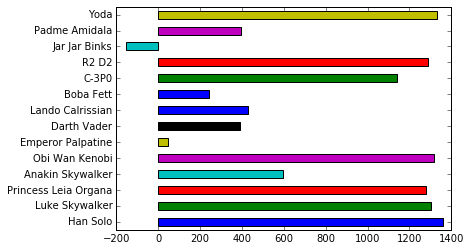

In [76]:
star_wars.iloc[:,15:29].sum().plot.barh()

* Han Solo is the most liked character
* Jar Jar Binks is the least liked character and the only one to have a negative rating
* Emperor Palpatine is the most controversial in terms of ratings